#### Dashboard for this dataset
https://public.tableau.com/profile/bartekkrol#!/

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', 150)

In [2]:
df = pd.read_excel('./data.xls')

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


## What is the overall sales trend for the current year?

In [4]:
# taking year, month from 'Order Date'
df['Year_Month'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [5]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year_Month
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2018-11
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2018-11


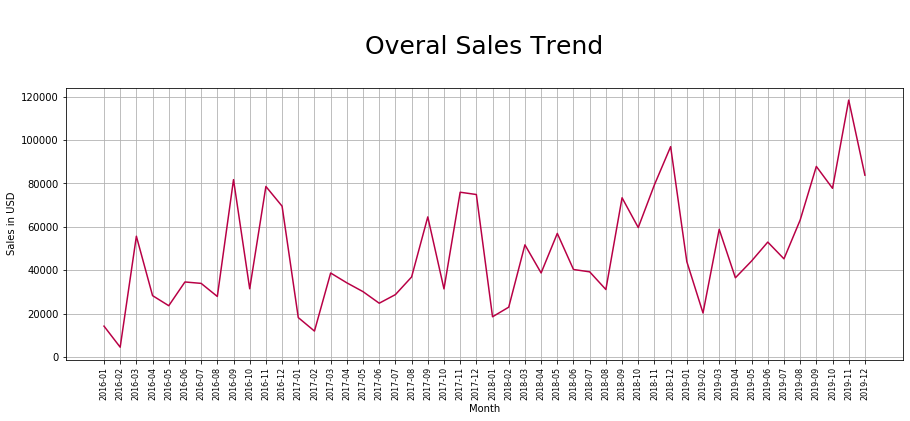

In [9]:
months_sum = df.groupby('Year_Month').sum()
months = [month for month, df in df.groupby('Year_Month')]
plt.figure(figsize=(15,5))
plt.plot(months,months_sum['Sales'], color = '#b80045')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.title("\n Overal Sales Trend \n", size=25)
plt.grid()
plt.show()

## What is the overall MoM, QoQ and YoY change?

### Month over Month

In [10]:
MoM_Data = pd.DataFrame(months_sum['Sales'])

In [11]:
# To calculate MoM i need value of 2015-12 (DataFrame is from 2016-01) 
# taking value from Sales 2019-12 = 83829.3188 and roll to first index of 'Last_Month'
MoM_Data['Last_Month'] = np.roll(MoM_Data['Sales'],1)

In [12]:
# display only first and last index
MoM_Data.iloc[[0,-1]]

,Sales,Last_Month
Year_Month,,
2016-01,14236.8950,83829.3188
2019-12,83829.3188,118447.8250


In [13]:
# and in the end i need to drop value of first index (2016-01)
MoM_Data = MoM_Data.drop(MoM_Data.index[0])
MoM_Data.head()

,Sales,Last_Month
Year_Month,,
2016-02,4519.8920,14236.895
2016-03,55691.0090,4519.892
2016-04,28295.3450,55691.009
2016-05,23648.2870,28295.345
2016-06,34595.1276,23648.287


In [14]:
# calculating MoM changing for each month
MoM_Data['% Change'] = (MoM_Data['Sales']/MoM_Data['Last_Month'])-1
MoM_Data.head()

,Sales,Last_Month,% Change
Year_Month,,,
2016-02,4519.8920,14236.895,-0.682523
2016-03,55691.0090,4519.892,11.321314
2016-04,28295.3450,55691.009,-0.491923
2016-05,23648.2870,28295.345,-0.164234
2016-06,34595.1276,23648.287,0.462902


In [15]:
##Plotting MoM Changing
MoM_Data.reset_index(inplace=True)
results_months = MoM_Data[['% Change','Year_Month']]

In [14]:
results_months

,% Change,Year_Month
0,-0.682523,2016-02
1,11.321314,2016-03
2,-0.491923,2016-04
3,-0.164234,2016-05
4,0.462902,2016-06
5,-0.018752,2016-07
6,-0.177837,2016-08
7,1.930093,2016-09
8,-0.615378,2016-10
9,1.499848,2016-11


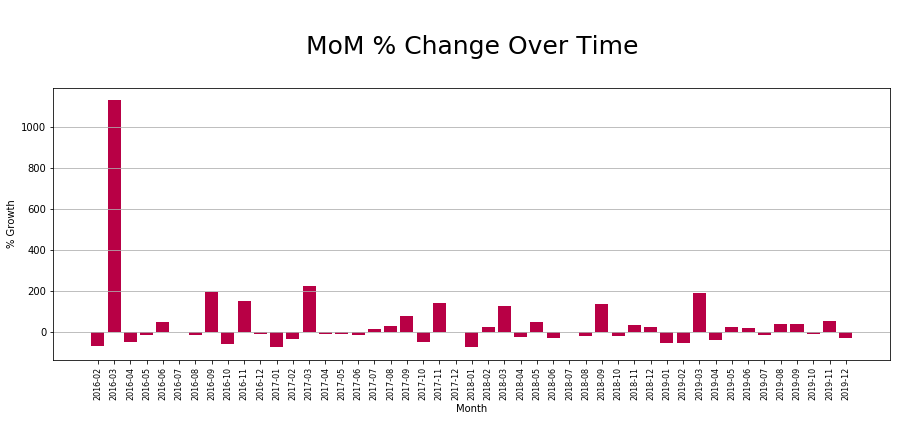

In [16]:
plt.figure(figsize=(15,5))
plt.bar(results_months['Year_Month'],results_months['% Change']*100, color = '#b80045')
plt.xticks(results_months['Year_Month'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM % Change Over Time \n", size=25)
plt.grid(axis='y')
plt.show()

### Quarter over Quarter

In [17]:
# taking Quarter from Date YYYY-MM-DD
df['Quarter'] = pd.PeriodIndex(df['Order Date'], freq='Q')

In [18]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year_Month,Quarter
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2018-11,2018Q4
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2018-11,2018Q4


In [19]:
QoQ_Data = df.groupby('Quarter').sum()

In [20]:
QoQ_Data

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Quarter,,,,,,
2016Q1,1489986,15706610.0,74447.7960,1028,44.40,3811.2290
2016Q2,1794127,21049066.0,86538.7596,1523,57.02,11204.0692
2016Q3,2774444,32196388.0,143633.2123,2159,87.47,12804.7218
2016Q4,3845458,44319183.0,179627.7302,2871,126.57,21723.9541
2017Q1,1293561,13896842.0,68851.7386,990,37.96,9264.9416
2017Q2,2356170,23578815.0,89124.1870,1604,76.20,12190.9224
2017Q3,2862956,28743146.0,130259.5752,2241,90.02,16853.6194
2017Q4,3901009,44978628.0,182297.0082,3144,122.91,23309.1203
2018Q1,1722141,16244435.0,93237.1810,1243,50.92,11441.3708


In [21]:
sum(QoQ_Data['Sales'])

2297200.8603

In [22]:
sum(df['Sales'])

2297200.860299955

In [23]:
QoQ_Data = pd.DataFrame(QoQ_Data['Sales'])

In [24]:
# To calculate QoQ i need value of 2015-Q4 (DataFrame is from 2016-Q1) 
# taking value from Sales 2019-Q4 = 83829.3188 and roll to first index of 'Last_Qrt'
QoQ_Data['Last_Qtr'] = np.roll(QoQ_Data['Sales'],1)

In [25]:
QoQ_Data.iloc[[0,-1]]

,Sales,Last_Qtr
Quarter,,
2016Q1,74447.796,280054.067
2019Q4,280054.067,196251.956


In [26]:
# and in the end i need to drop value of first index (2016-Q1)
QoQ_Data = QoQ_Data.drop(QoQ_Data.index[0])

In [27]:
#Calculating QoQ Change for each Qtr:
QoQ_Data['% Change Qrt'] = (QoQ_Data['Sales']/QoQ_Data['Last_Qtr'])-1
QoQ_Data

,Sales,Last_Qtr,% Change Qrt
Quarter,,,
2016Q2,86538.7596,74447.7960,0.162409
2016Q3,143633.2123,86538.7596,0.659756
2016Q4,179627.7302,143633.2123,0.250600
2017Q1,68851.7386,179627.7302,-0.616698
2017Q2,89124.1870,68851.7386,0.294436
2017Q3,130259.5752,89124.1870,0.461551
2017Q4,182297.0082,130259.5752,0.399490
2018Q1,93237.1810,182297.0082,-0.488542
2018Q2,136082.3010,93237.1810,0.459528


In [28]:
##Plotting QoQ Change
QoQ_Data.reset_index(inplace=True)
results_quarter = QoQ_Data[['% Change Qrt','Quarter']]

In [101]:
results_quarter

,% Change Qrt,Quarter
0,0.162409,2016Q2
1,0.659756,2016Q3
2,0.250600,2016Q4
3,-0.616698,2017Q1
4,0.294436,2017Q2
5,0.461551,2017Q3
6,0.399490,2017Q4
7,-0.488542,2018Q1
8,0.459528,2018Q2
9,0.056621,2018Q3


In [29]:
import warnings
warnings.filterwarnings('ignore')
results_quarter['Quarter']=results_quarter['Quarter'].astype(str)

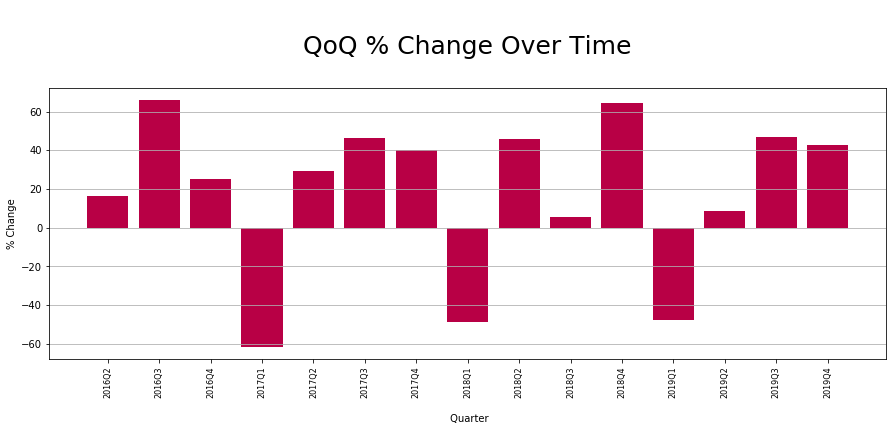

In [30]:
plt.figure(figsize=(15,5))
plt.bar(results_quarter['Quarter'],results_quarter['% Change Qrt']*100, color = '#b80045')
plt.xticks(results_quarter['Quarter'], rotation='vertical', size = 8)
plt.ylabel('% Change')
plt.xlabel('\n Quarter')
plt.title("\n QoQ % Change Over Time \n", size=25)
plt.grid(axis='y')
plt.show()

### Year over Year change by months

In [31]:
#Creating sales grouped by Month-Year again
YoY_Data = pd.DataFrame(df.groupby('Year_Month').sum()['Sales'])
YoY_Data['Last_Year'] = np.roll(YoY_Data['Sales'],12)
YoY_Data

,Sales,Last_Year
Year_Month,,
2016-01,14236.8950,43971.3740
2016-02,4519.8920,20301.1334
2016-03,55691.0090,58872.3528
2016-04,28295.3450,36521.5361
2016-05,23648.2870,44261.1102
2016-06,34595.1276,52981.7257
2016-07,33946.3930,45264.4160
2016-08,27909.4685,63120.8880
2016-09,81777.3508,87866.6520


In [32]:
# for calculation i need to drop rows from year 2016
YoY_Data = YoY_Data.drop(YoY_Data.index[0:12])
YoY_Data.head()

,Sales,Last_Year
Year_Month,,
2017-01,18174.0756,14236.895
2017-02,11951.4110,4519.892
2017-03,38726.2520,55691.009
2017-04,34195.2085,28295.345
2017-05,30131.6865,23648.287


In [33]:
#Calculating YoY Growth for each month:
YoY_Data['% Change'] = (YoY_Data['Sales']/YoY_Data['Last_Year'])-1
YoY_Data.head()

,Sales,Last_Year,% Change
Year_Month,,,
2017-01,18174.0756,14236.895,0.276548
2017-02,11951.4110,4519.892,1.644181
2017-03,38726.2520,55691.009,-0.304623
2017-04,34195.2085,28295.345,0.208510
2017-05,30131.6865,23648.287,0.274159


In [36]:
##Plotting YoY change
YoY_Data.reset_index(inplace=True)
results_YoY = YoY_Data[['% Change','Year_Month']]
results_YoY

,% Change,Year_Month
0,0.276548,2017-01
1,1.644181,2017-02
2,-0.304623,2017-03
3,0.208510,2017-04
4,0.274159,2017-05
5,-0.283214,2017-06
6,-0.152625,2017-07
7,0.322072,2017-08
8,-0.210100,2017-09
9,-0.001541,2017-10


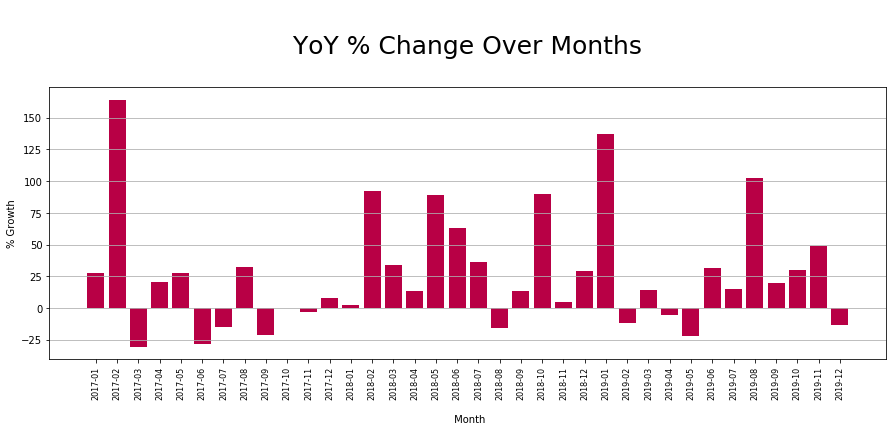

In [37]:
plt.figure(figsize=(15,5))
plt.bar(results_YoY['Year_Month'],results_YoY['% Change']*100, color = '#b80045')
plt.xticks(results_YoY['Year_Month'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('\n Month')
plt.title("\n YoY % Change Over Months \n", size=25)
plt.grid(axis='y')
plt.show()

### Top 10 products by sales

In [38]:
prod_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])

In [39]:
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

In [40]:
# Top 10 products by sales
top10_sale = prod_sales.head(10)
top10_sale

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


### Top 10 most selling products by quantity

In [41]:
prod_sales_quantity = pd.DataFrame(df.groupby('Product Name').sum()['Quantity'])

In [42]:
prod_sales_quantity.sort_values(by=['Quantity'], inplace=True, ascending=False)

In [79]:
# Top 10 products by quantity
top10_quantity = prod_sales_quantity.head(10)
top10_quantity

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


### Top 10 most profitable products

In [43]:
prod_profit = pd.DataFrame(df.groupby('Product Name').sum()['Profit'])

In [44]:
prod_profit.sort_values(by='Profit', inplace=True, ascending=False)

In [90]:
# Top 10 products by profit
top10_profit = prod_profit.head(10)
top10_profit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823
